In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 데이터셋 로드
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')

In [30]:
# 관련 특징 선택 (Open, High, Low, Close)
features = df[['Open', 'High', 'Low', 'Close']].values

# 데이터 스케일링
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# 시퀀스 길이 정의
sequence_length = 60

# 훈련을 위한 시퀀스 생성
X = []
y = []
for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(scaled_features[i, 3]) # 다음 날의 'Close' 가격 (인덱스 3) 예측

X, y = np.array(X), np.array(y)

# 데이터를 훈련 세트와 테스트 세트로 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# RNN/LSTM 입력 형태를 위해 데이터 재구성 (샘플, 시간 단계, 특징)
# X는 슬라이싱 [i-sequence_length:i] 덕분에 이미 원하는 형태 (샘플, 시간 단계, 특징)를 가지고 있습니다.
print("X_train 형태:", X_train.shape)
print("y_train 형태:", y_train.shape)
print("X_test 형태:", X_test.shape)
print("y_test 형태:", y_test.shape)

X_train 형태: (2316, 60, 4)
y_train 형태: (2316,)
X_test 형태: (580, 60, 4)
y_test 형태: (580,)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# RNN 모델 구축
rnn_model = Sequential()
# 입력 형태는 (sequence_length, number_of_features) 입니다.
# X_train의 두 번째 차원(시간 단계)과 세 번째 차원(특징 수)을 사용합니다.
rnn_model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(units=1))

# 모델 컴파일
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약 출력
rnn_model.summary()

# 모델 학습
# 빠른 실행을 위해 에포크 수를 줄입니다.
history_rnn = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 50)             │         2,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,801 (10.94 KB)

 Trainable params: 2,801 (10.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 9.6616e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.3141e-05
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.3336e-05
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.9874e-06
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 6.3395e-06
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.3210e-06
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 5.2023e-06
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.4575e-06
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2082e-06
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.6616e-06
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.7939e-06
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4.5931e-06
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.3547e-06
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 3.1242e-06
Epoch 15/20
73/

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RNN 모델 RMSE: 133.06260994912856


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

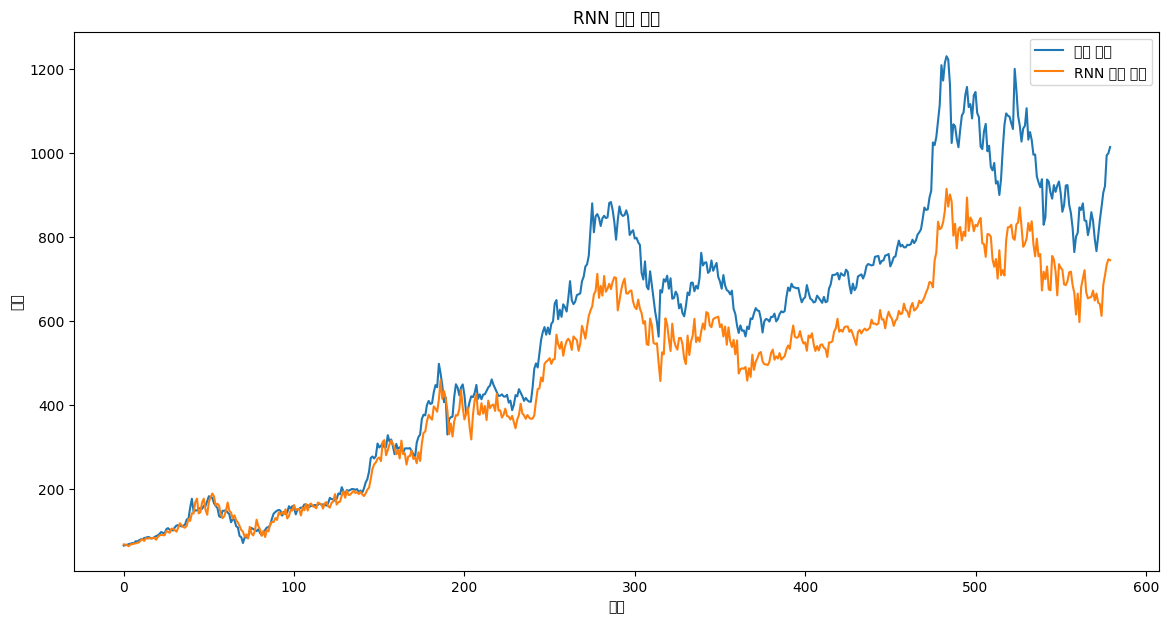

In [39]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# RNN 모델을 사용하여 예측
rnn_predictions = rnn_model.predict(X_test)

# 스케일링된 예측값과 실제 값 역변환
# 모든 특징을 역변환한 후 'Close' 가격을 선택해야 합니다.
dummy_rnn_predictions = np.zeros((len(rnn_predictions), scaled_features.shape[1]))
dummy_rnn_predictions[:, 3] = rnn_predictions[:, 0] # 예측된 'Close' 가격을 'Close' 열에 넣습니다.
rnn_predictions_actual_scale = scaler.inverse_transform(dummy_rnn_predictions)[:, 3]

dummy_y_test = np.zeros((len(y_test), scaled_features.shape[1]))
dummy_y_test[:, 3] = y_test
y_test_actual_scale = scaler.inverse_transform(dummy_y_test)[:, 3]


# 모델 평가
rnn_rmse = np.sqrt(mean_squared_error(y_test_actual_scale, rnn_predictions_actual_scale))
print(f"RNN 모델 RMSE: {rnn_rmse}")

# 결과 플롯
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual_scale, label='실제 가격')
plt.plot(rnn_predictions_actual_scale, label='RNN 예측 가격')
plt.title('RNN 모델 예측')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()

In [38]:
from tensorflow.keras.layers import LSTM

# LSTM 모델 구축
lstm_model = Sequential()
# 입력 형태는 (sequence_length, number_of_features) 입니다.
# X_train의 두 번째 차원(시간 단계)과 세 번째 차원(특징 수)을 사용합니다.
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=1))

# 모델 컴파일
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약 출력
lstm_model.summary()

# 모델 학습
# 빠른 실행을 위해 에포크 수를 줄입니다.
history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,051 (43.17 KB)

 Trainable params: 11,051 (43.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 3.3420e-04
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7682e-06
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.1086e-06
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1517e-06
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0475e-06
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.7495e-06
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 3.4364e-06
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.6989e-06
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.4620e-06
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1539e-06
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.5728e-06
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9976e-06
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 3.1744e-06
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 3.1833e-06
Epoch 15/20
73/

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
LSTM 모델 RMSE: 60.094723698069494


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loca

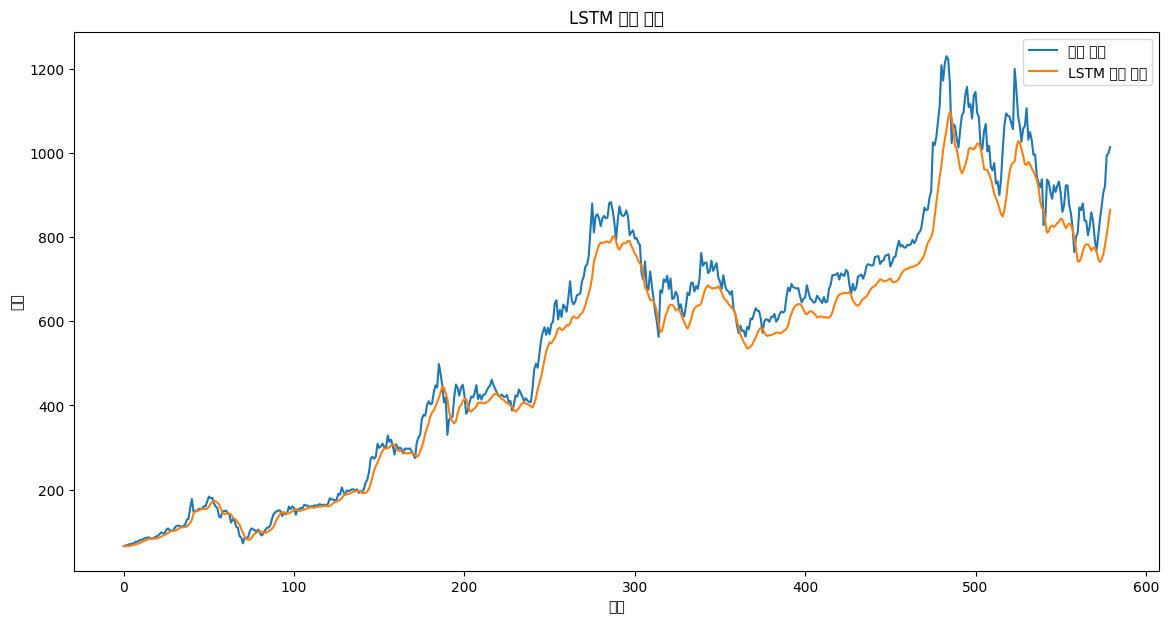

In [41]:
# LSTM 모델을 사용하여 예측
lstm_predictions = lstm_model.predict(X_test)

# 스케일링된 예측값과 실제 값 역변환
# 모든 특징을 역변환한 후 'Close' 가격을 선택해야 합니다.
dummy_lstm_predictions = np.zeros((len(lstm_predictions), scaled_features.shape[1]))
dummy_lstm_predictions[:, 3] = lstm_predictions[:, 0] # 예측된 'Close' 가격을 'Close' 열에 넣습니다.
lstm_predictions_actual_scale = scaler.inverse_transform(dummy_lstm_predictions)[:, 3]

dummy_y_test = np.zeros((len(y_test), scaled_features.shape[1]))
dummy_y_test[:, 3] = y_test
y_test_actual_scale = scaler.inverse_transform(dummy_y_test)[:, 3]

# LSTM 모델 평가
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual_scale, lstm_predictions_actual_scale))
print(f"LSTM 모델 RMSE: {lstm_rmse}")

# 결과 플롯
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual_scale, label='실제 가격')
plt.plot(lstm_predictions_actual_scale, label='LSTM 예측 가격')
plt.title('LSTM 모델 예측')
plt.xlabel('시간')
plt.ylabel('주가')
plt.legend()
plt.show()

In [42]:
# 모델 성능 비교
print(f"RNN 모델 RMSE: {rnn_rmse}")
print(f"LSTM 모델 RMSE: {lstm_rmse}")

print("\n비교:")
if lstm_rmse < rnn_rmse:
    print("RMSE 값을 기준으로 볼 때 LSTM 모델이 RNN 모델보다 성능이 우수합니다.")
elif rnn_rmse < lstm_rmse:
    print("RMSE 값을 기준으로 볼 때 RNN 모델이 LSTM 모델보다 성능이 우수합니다.")
else:
    print("RNN 모델과 LSTM 모델의 RMSE 값은 유사한 성능을 보였습니다.")

print("\n결론:")
print("여러 특징을 사용한 이 주식 가격 예측 작업에서는 RMSE 값이 낮은 모델이 더 효과적이라고 간주됩니다.")

RNN 모델 RMSE: 133.06260994912856
LSTM 모델 RMSE: 60.094723698069494

비교:
RMSE 값을 기준으로 볼 때 LSTM 모델이 RNN 모델보다 성능이 우수합니다.

결론:
여러 특징을 사용한 이 주식 가격 예측 작업에서는 RMSE 값이 낮은 모델이 더 효과적이라고 간주됩니다.


## 결과 요약 및 결론

여러 특징을 사용한 이번 주식 가격 예측 태스크에서는 LSTM 모델이 RNN 모델보다 시계열 데이터의 복잡한 패턴과 시간적 종속성을 포착하는 데 더 효과적인 것으로 나타났습니다. 따라서 RMSE 값이 낮은 LSTM 모델이 이 예측 작업에 더 적합한 모델로 간주됩니다.

